# **Travel Insurance**

## **1. Business Problem Understanding**

___

**Context**

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik di dalam negeri maupun di luar negeri. Beberapa negara bahkan mewajibkan pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis pada perusahaan asuransi adalah data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

**Problem Statement**

Permasalahan yang terjadi yaitu orang-orang setelah melakukan perjalanan mengajukan klaim asuransi dan orang-orang setelah melakukan perjalanan tidak mengajukan klaim asuransi dalam hal ini perusahaan agen merekrut freelance data science untuk memprediksi orang-orang mengajukan klaim dan orang-orang tidak mengajukan klaim setelah perjalanan. sasaran yang dituju untuk freelance yaitu Divisi Marketing pada perusahaan asuransi.

**Goals**

- Memprediksi orang-orang yang tidak mengajukan klaim ke asuransi setelah perjalanan, apakah melakukan perjalanan tetapi lupa untuk klaim ke asuransi

**Analytic Approach**

setelah melakukan prediksi yaitu orang-orang yang tidak mengajukan klaim ke asuransi setelah perjalanan, maka perusahaan asuransi mengetahui dampak kerugian dalam sekali perjalanan yang tidak klaim

**Metric Evaluation**

Berdasarkan permasalahan yang terjadi freelance membuat target prediksi sebagai berikut: 

Target:

- 0 : Tidak Klaim Asuransi Perjalanan
- 1 : Klaim Asuransi Perjalanan

freelance memprediksi 2 kondisi terjadi sebagai berikut:

- Kondisi 1 (False Positive) : Aktual orang tidak klaim asuransi perjalanan prediksi klaim asuransi perjalanan
- Kondisi 2 (False Negative)  : Aktual orang klaim asuransi perjalanan prediksi tidak klaim asuransi perjalanan

Gambaran umum untuk mengurangi kerugian asuransi perjalanan dengan asumsi sebagai berikut:

- ketentuan harga penjualan asuransi bergantung pada harga perjalanan disini saya menggunakan harga total perjalanan $3000 dengan asumsi net sales 5% dari jumlah harga total perjalanan yaitu $300 tahun 2023 [[Sumber](https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/)]

Saya berasumsi 2 kondisi diatas False Negative naik dari False Positive turun, maka saya akan membuat model yang dapat mengurangi jumlah false negative adalah memakai metode Recall Score 


## **2. Data Understanding**

____

saya menguraikan data understanding teridiri dari Load Dataset, info data, missing value, duplikat data, Keunikan Data

### **2.1 Load Dataset**

Mengupload dan memprediksi dataset sudah ada yaitu 'Travel_Insurance.csv' 

In [743]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest

import warnings
warnings.filterwarnings('ignore')

In [744]:
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


**Keterangan Kolom:**

- Agensi: Nama agensi.
- Jenis Agensi: Jenis agen asuransi perjalanan.
- Saluran Distribusi: Saluran agen asuransi perjalanan.
- Nama Produk: Nama produk asuransi perjalanan.
- Jenis kelamin: Jenis kelamin tertanggung.
- Durasi: Durasi perjalanan.
- Tujuan: Tujuan perjalanan.
- Penjualan Bersih: Jumlah penjualan polis asuransi perjalanan.
- Komisi (dalam nilai): Komisi yang diterima untuk agen asuransi perjalanan.
- Usia: Usia tertanggung.
- Klaim: Status klaim.


### **2.2 Info Data**

info data disini menjabarkan baris data, kolom nama, tipe data, dan nama-nama kolom

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


**Interpretasi:**

- Dataset diatas terdiri dari 44328 baris dan 10 kolom
- Tipe data terdiri dari objek, interger, dan float

### **2.3 Data Kosong**

In [746]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

**Interpretasi:**

- Kolom gender missing value sebesar 31647 data kosong

### **2.4 Data Duplikat**

In [747]:
df.duplicated().sum()

4667

**Interpretasi:**

- Data duplikat sebesar 4667 baris

### **2.5 Data Statistik Numerikal dan Kategorikal**

In [748]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


**Interpretasi**

- Statistik numerikal Count sebesar 44328 semua kolom
- Statistik numerikal kolom Duration nilai mean dan std range 49 sampai 110
- Statistik numerikal kolom Duration nilai min sampai max range -1 sampai dengan 4881.00
- Statistik numerikal kolom Net Sales nilai mean dan std range 40 sampai 49
- Statistik numerikal kolom Net sales nilai min sampai max range -357.5 sampai dengan 810
- Statistik numerikal kolom Commision (in value) nilai mean dan std range 9 sampai 20
- Statistik numerikal kolom Commision (in value) nilai min sampai max range 0 sampai 284
- Statistik numerikal kolom Age nilai mean sebesar 39.92
- Statistik numerikal kolom Age nilai std sebesar 13.954
- Statistik numerikal kolom Age nilai min sampai dengan max range 0 sampai 119

In [749]:
df.describe(include=object).drop(columns='Gender')

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Claim
count,44328,44328,44328,44328,44328,44328
unique,16,2,2,26,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE,No
freq,24656,32113,43572,12979,9267,43651


**Interpretasi**

- Statistik kategorikal Count sebesar 44328 semua kolom
- Statistik kategorikal kolom Agency nilai unique 16
- Statistik kategorikal kolom Agency kata yang sering digunakan EPX
- Statistik kategorikal kolom Agency jumlah frekuensi kata yang sering ada sebesar 24656
- Statistik kategorikal kolom Agency Type nilai unique 2
- Statistik kategorikal kolom Agency Type kata yang sering digunakan Travel Agency
- Statistik kategorikal kolom Agency Type jumlah frekuensi kata yang sering ada sebesar 32113
- Statistik kategorikal kolom Product Name nilai unique 26
- Statistik kategorikal kolom Product Name kata yang sering digunakan Online
- Statistik kategorikal kolom Product Name jumlah frekuensi kata yang sering ada sebesar 43572
- Statistik kategorikal kolom Destination nilai unique 138
- Statistik kategorikal kolom Destination kata yang sering digunakan SINGAPORE
- Statistik kategorikal kolom Destination jumlah frekuensi kata yang sering ada sebesar 9267
- Statistik kategorikal kolom Claim nilai unique 2
- Statistik kategorikal kolom Claim kata yang sering digunakan No
- Statistik kategorikal kolom Claim jumlah frekuensi kata yang sering ada sebesar 43651

### **2.6 Keunikan Data**

In [750]:
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Online, Offline]"
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,2,"[F, nan, M]"
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 51, 65, 47, 35, 54, 23, 46, 58, 42, 31, 29, 37, 68, 8, 32, 61, 49, 56, 25, 50, 34, 38, 44, 118, 45, 53, 20, 30, 41, 69, 52, 40, 70, 76,

**Interpretasi:**

- Dataset diatas terdiri dari 44328 baris dan 10 kolom
- Tipe data terdiri dari objek, interger, dan float
- Missing Value pada kolom Gender
- Data duplikat sebesar 4667 baris

## **3. EDA**

___

Saya menganalisa Explorasi Data Analisa dari dataset berdasarkan fitur numerikal dan fitur kategorikal

### **3.1 Fitur Numerikal**

In [751]:
numerical_features = df.describe().columns

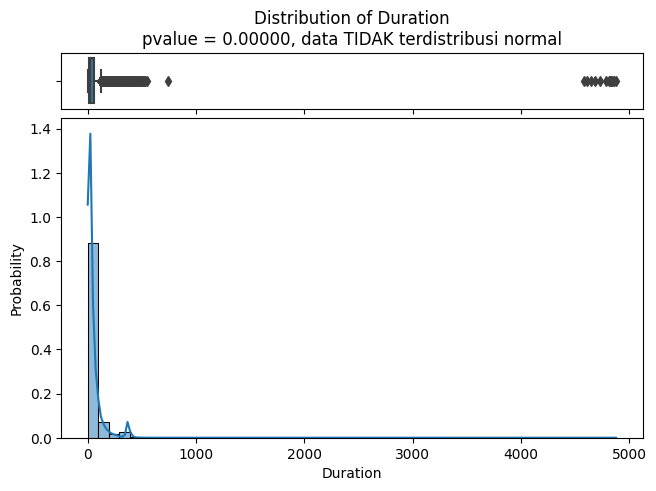

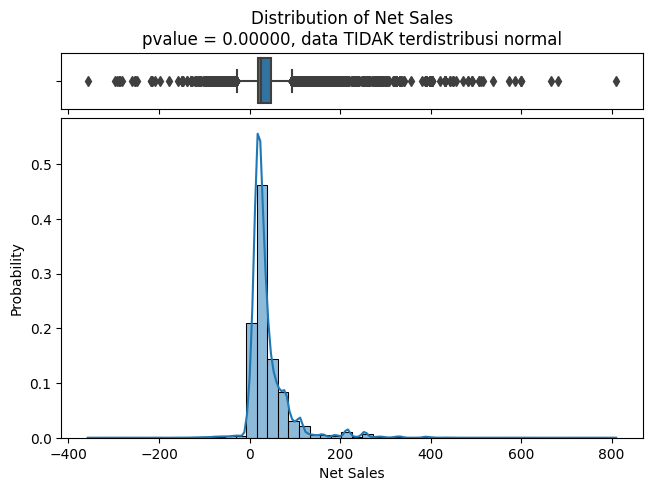

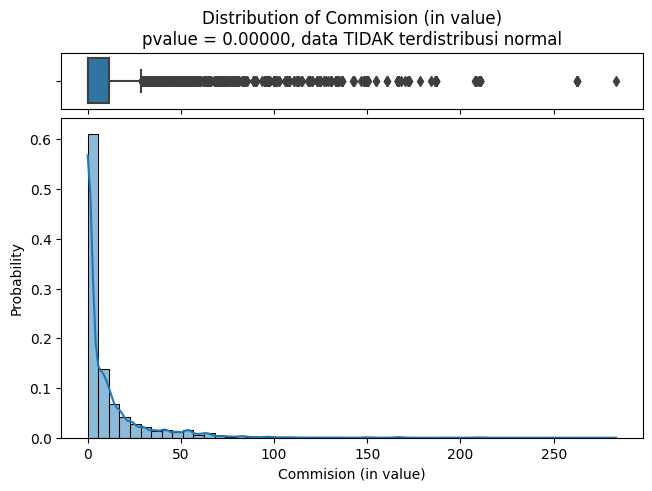

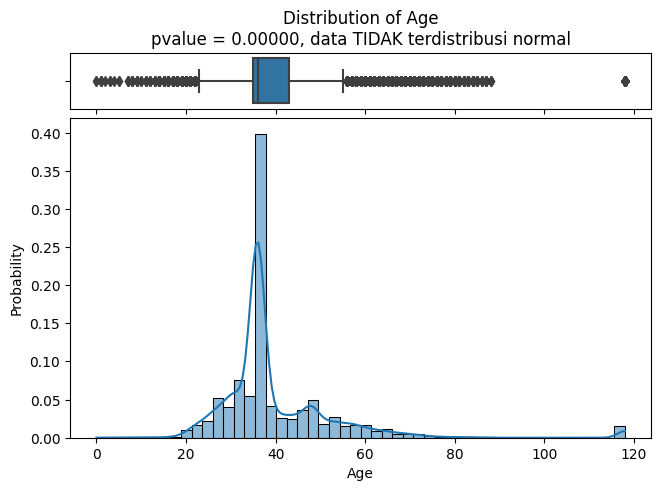

In [752]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

**Interpretasi:**

- fitur numerikal terdiri dari age, commision(invalue), net sales dan duration 
- Berdasarkan grafik diatas data fitur numerikal, distribusi data tidak normal nilai pvalue <0.05 
- Grafik diatas menggunakan boxplot dan histogram

### **3.2 Fitur Kategorikal**

In [753]:
categorical_features = df.drop(columns='Claim').describe(include='object').columns

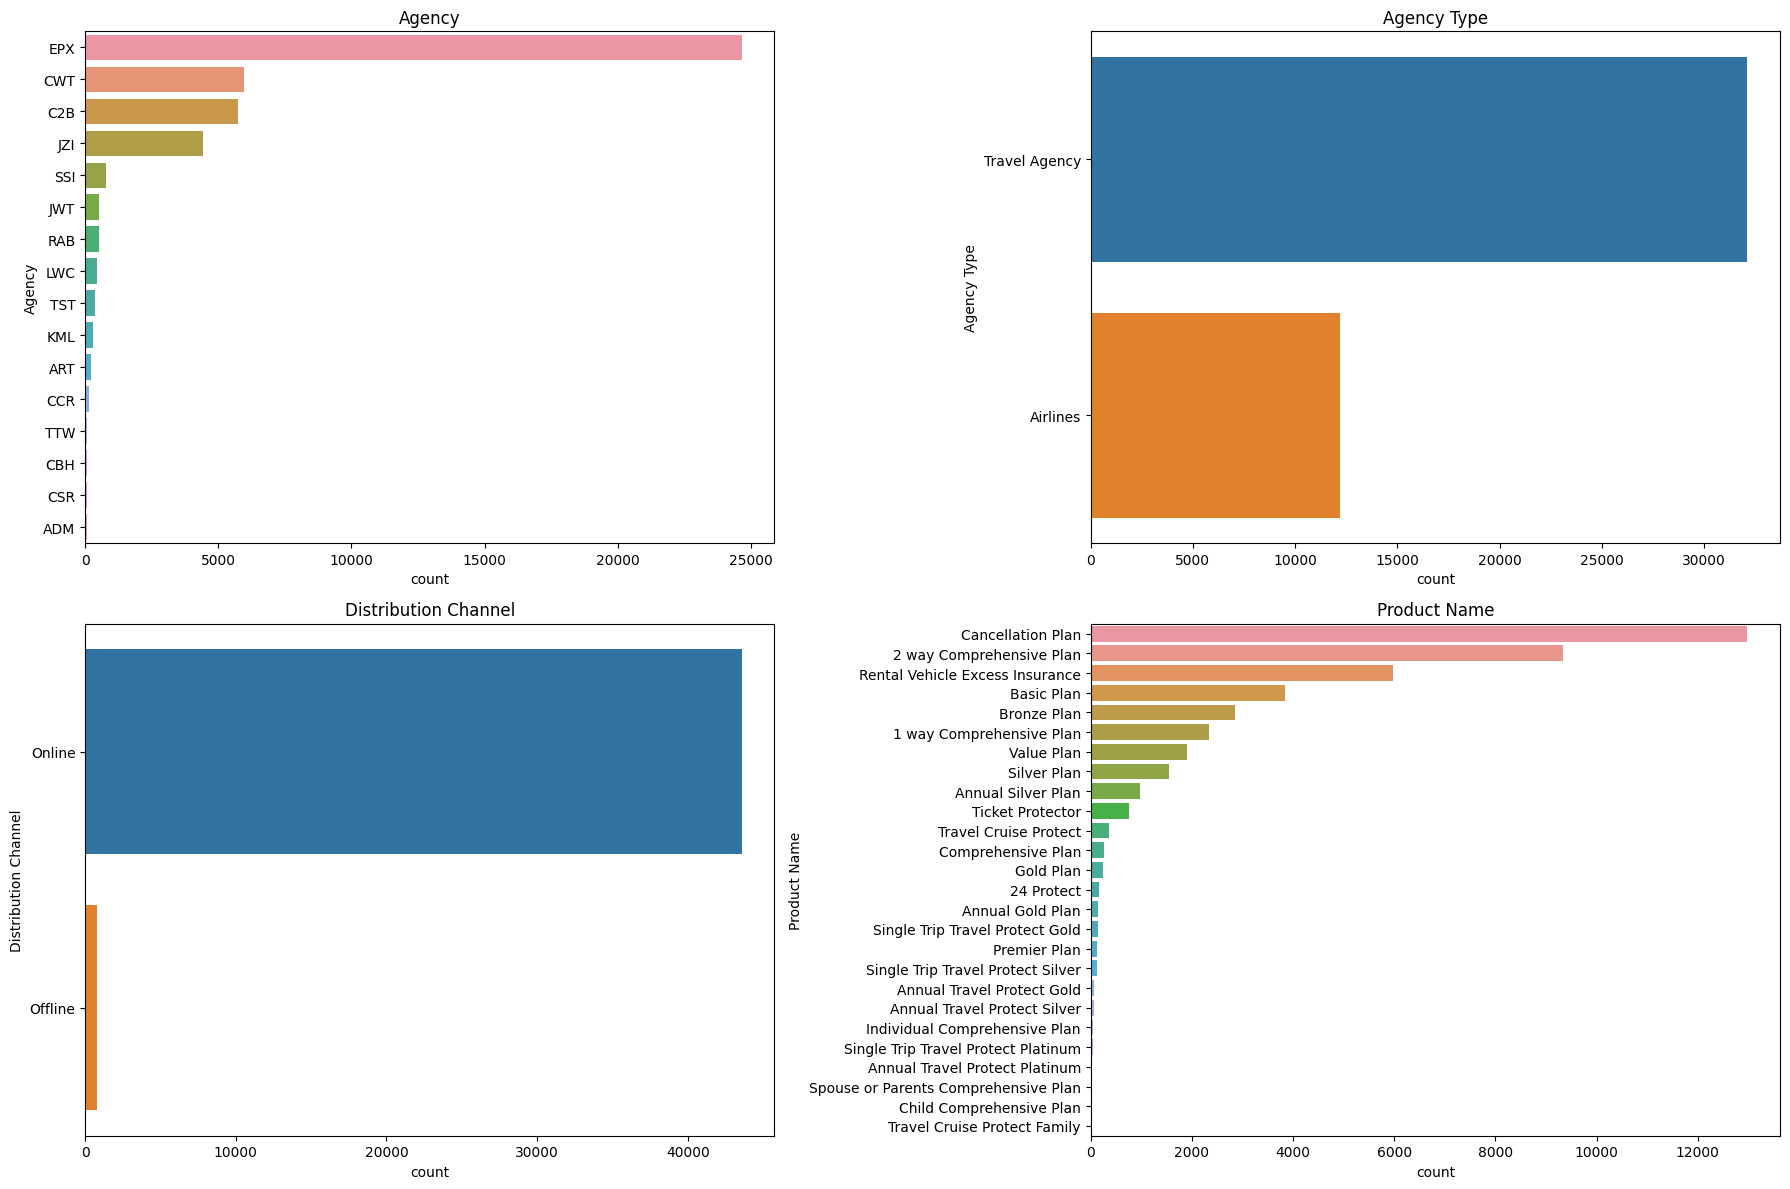

In [754]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

**Interpretasi:**

- Fitur kategorikal terdiri dari agency, agency type, distribution channel dan product name
- Grafik agency tertinggi adalah EPX  
- Grafik agency terendah adalah ADM
- Grafik agency type tertinggi adalah Travel Agency
- Grafik agency type terendah adalah Airlines
- Grafik distribution name tertinggi adalah Online
- Grafik distribution name terendah adalah Offline
- Grafik product name tertinggi adalah Cancellation Plan
- Grafik product name terendah adalah Travel Cruise Protect Family

### **3.3 Data Correlation**

In [755]:
corr = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']]

df_corr = corr.corr(method='spearman')
df_corr

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.279311,0.122437,-0.014345
Net Sales,0.279311,1.000000,0.298201,0.024171
Commision (in value),0.122437,0.298201,1.000000,0.145591
Age,-0.014345,0.024171,0.145591,1.000000


In [756]:
matrix = np.triu(df_corr)
matrix

array([[ 1.        ,  0.27931144,  0.12243667, -0.01434461],
       [ 0.        ,  1.        ,  0.29820052,  0.02417145],
       [ 0.        ,  0.        ,  1.        ,  0.14559134],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

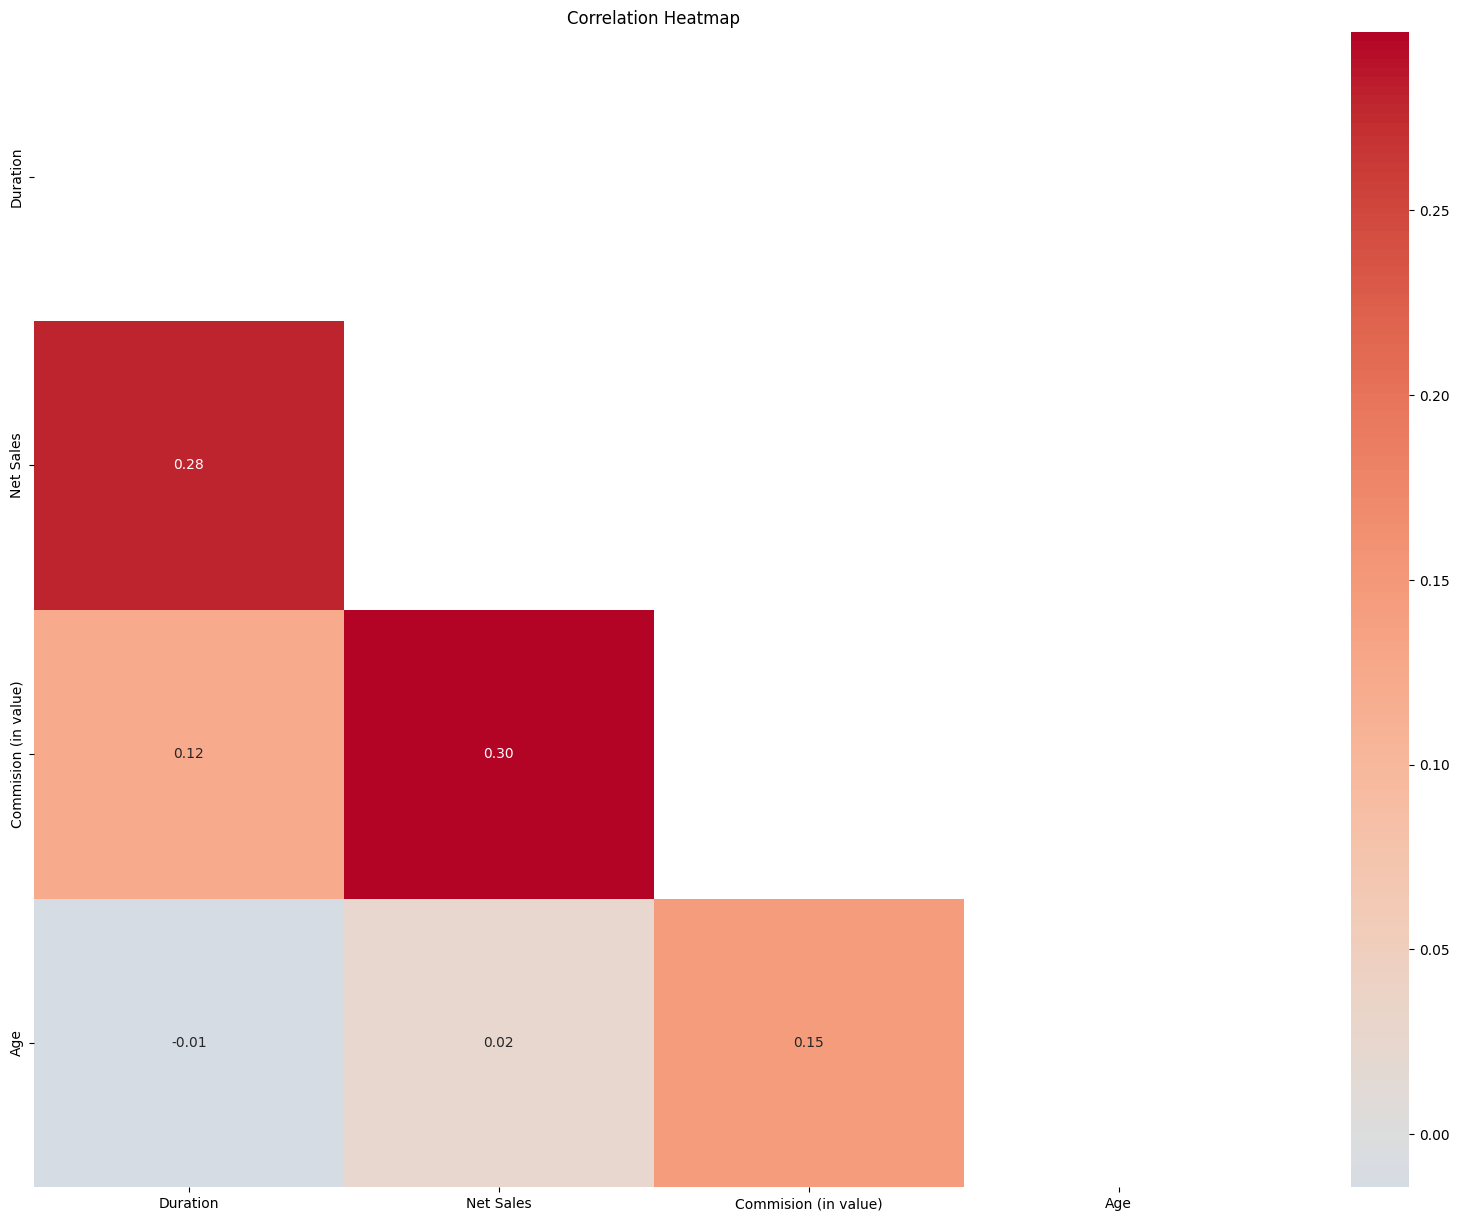

In [757]:
plt.figure(figsize=(20,15))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, mask=matrix, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

**Interpretasi:**

- Korelasi nilai lemah sebesar 0.30 dari hubungan Commision (in Value) dan net sales, nilai commision (in value) naik maka nilai net sales cukup naik
- Korelasi nilai lemah sebesar 0.28 dari hubungan Duration dan net sales, nilai Duration naik maka nilai net sales cukup naik
- Korelasi nilai lemah sebesar 0.15 dari hubungan Commision (in Value) dan age, nilai Commision (in value) naik maka nilai age cenderung naik 
- Korelasi nilai lemah sebesar 0.12 dari hubungan Commision (in Value) dan duration, nilai Commision (in value) naik maka nilai duration cenderung naik
- Korelasi nilai lemah sebesar 0.02 dari hubungan Age dan Net sales, nilai age naik maka nilai net sales sedikit cenderung naik
- Korelasi nilai lemah sebesar -0.01 dari hubungan Age dan Duration, nilai Age naik maka nilai Duration cukup turun

### **3.4 Plot of numerical features vs target**

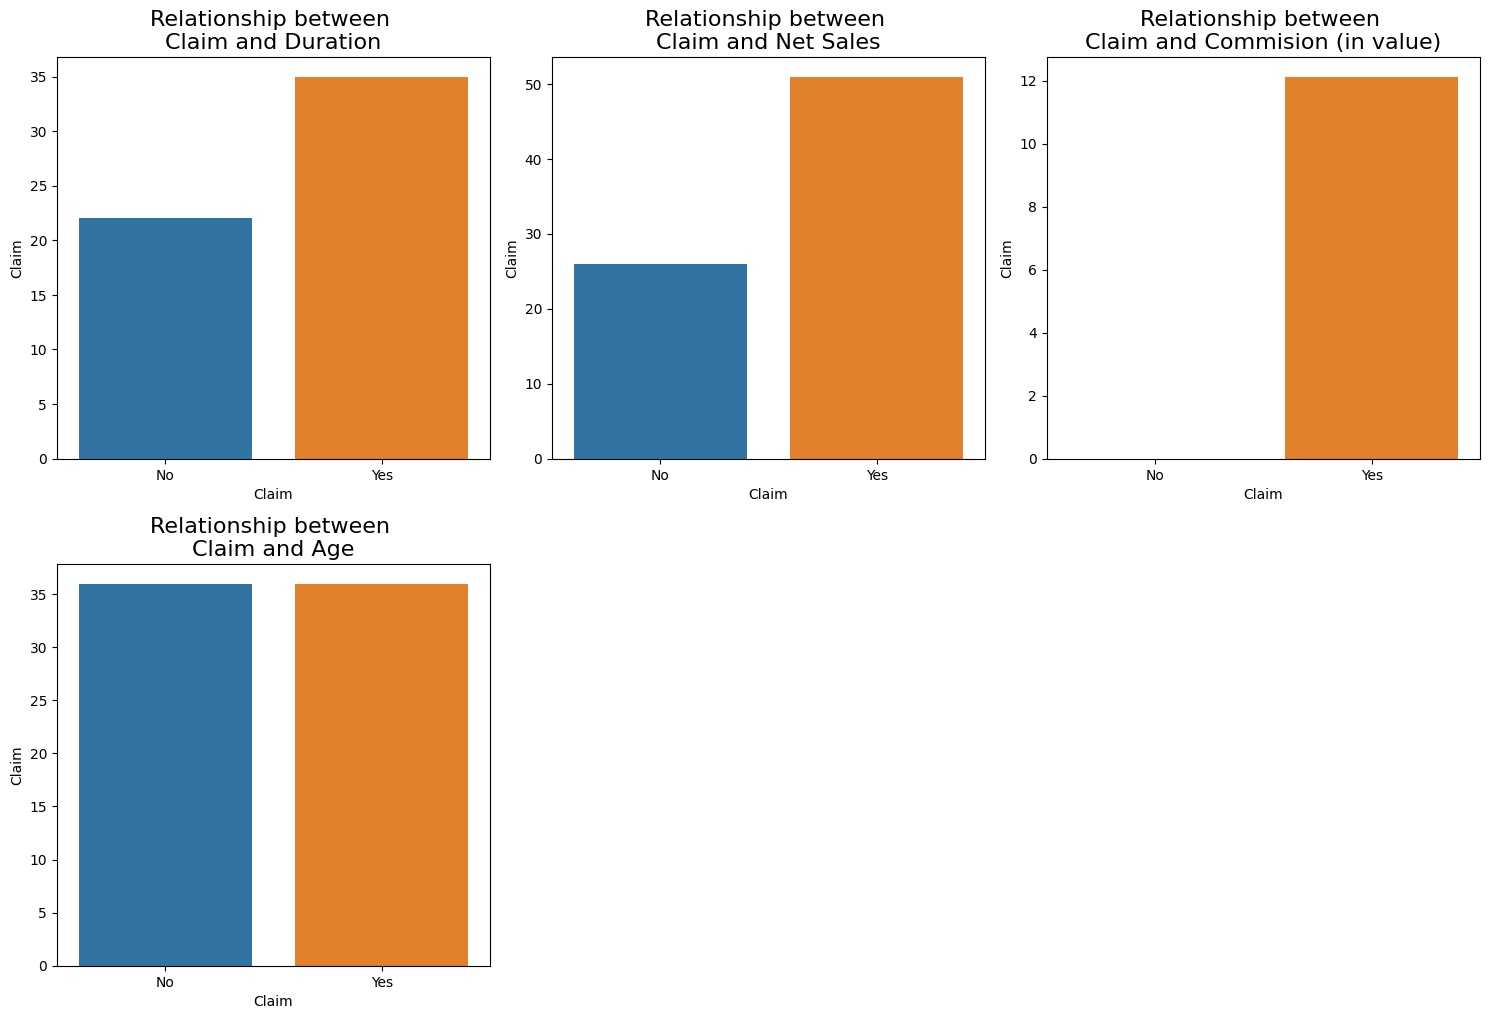

In [758]:
plt.figure(figsize=(15, 20))
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(4, 3, plotnumber)
    sns.barplot(x = 'Claim', y = feature, data = df, estimator=np.median, ci=0)
    plt.ylabel('Claim')
    plt.title(f'Relationship between \nClaim and {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

**Interpretasi:**

- Grafik hubungan claim antara duration, net sales, dan commision (in value) nilai tengah tertinggi adalah klaim yes 
- Grafik hubungan claim dan duration, net sales, dan commision (in value) nilai tengah terendah adalah klaim no 
- Grafik hubungan claim dan age nilai tengah sama tinggi antara klaim yes dan no 

### **3.5 Plot of categorical features vs target**

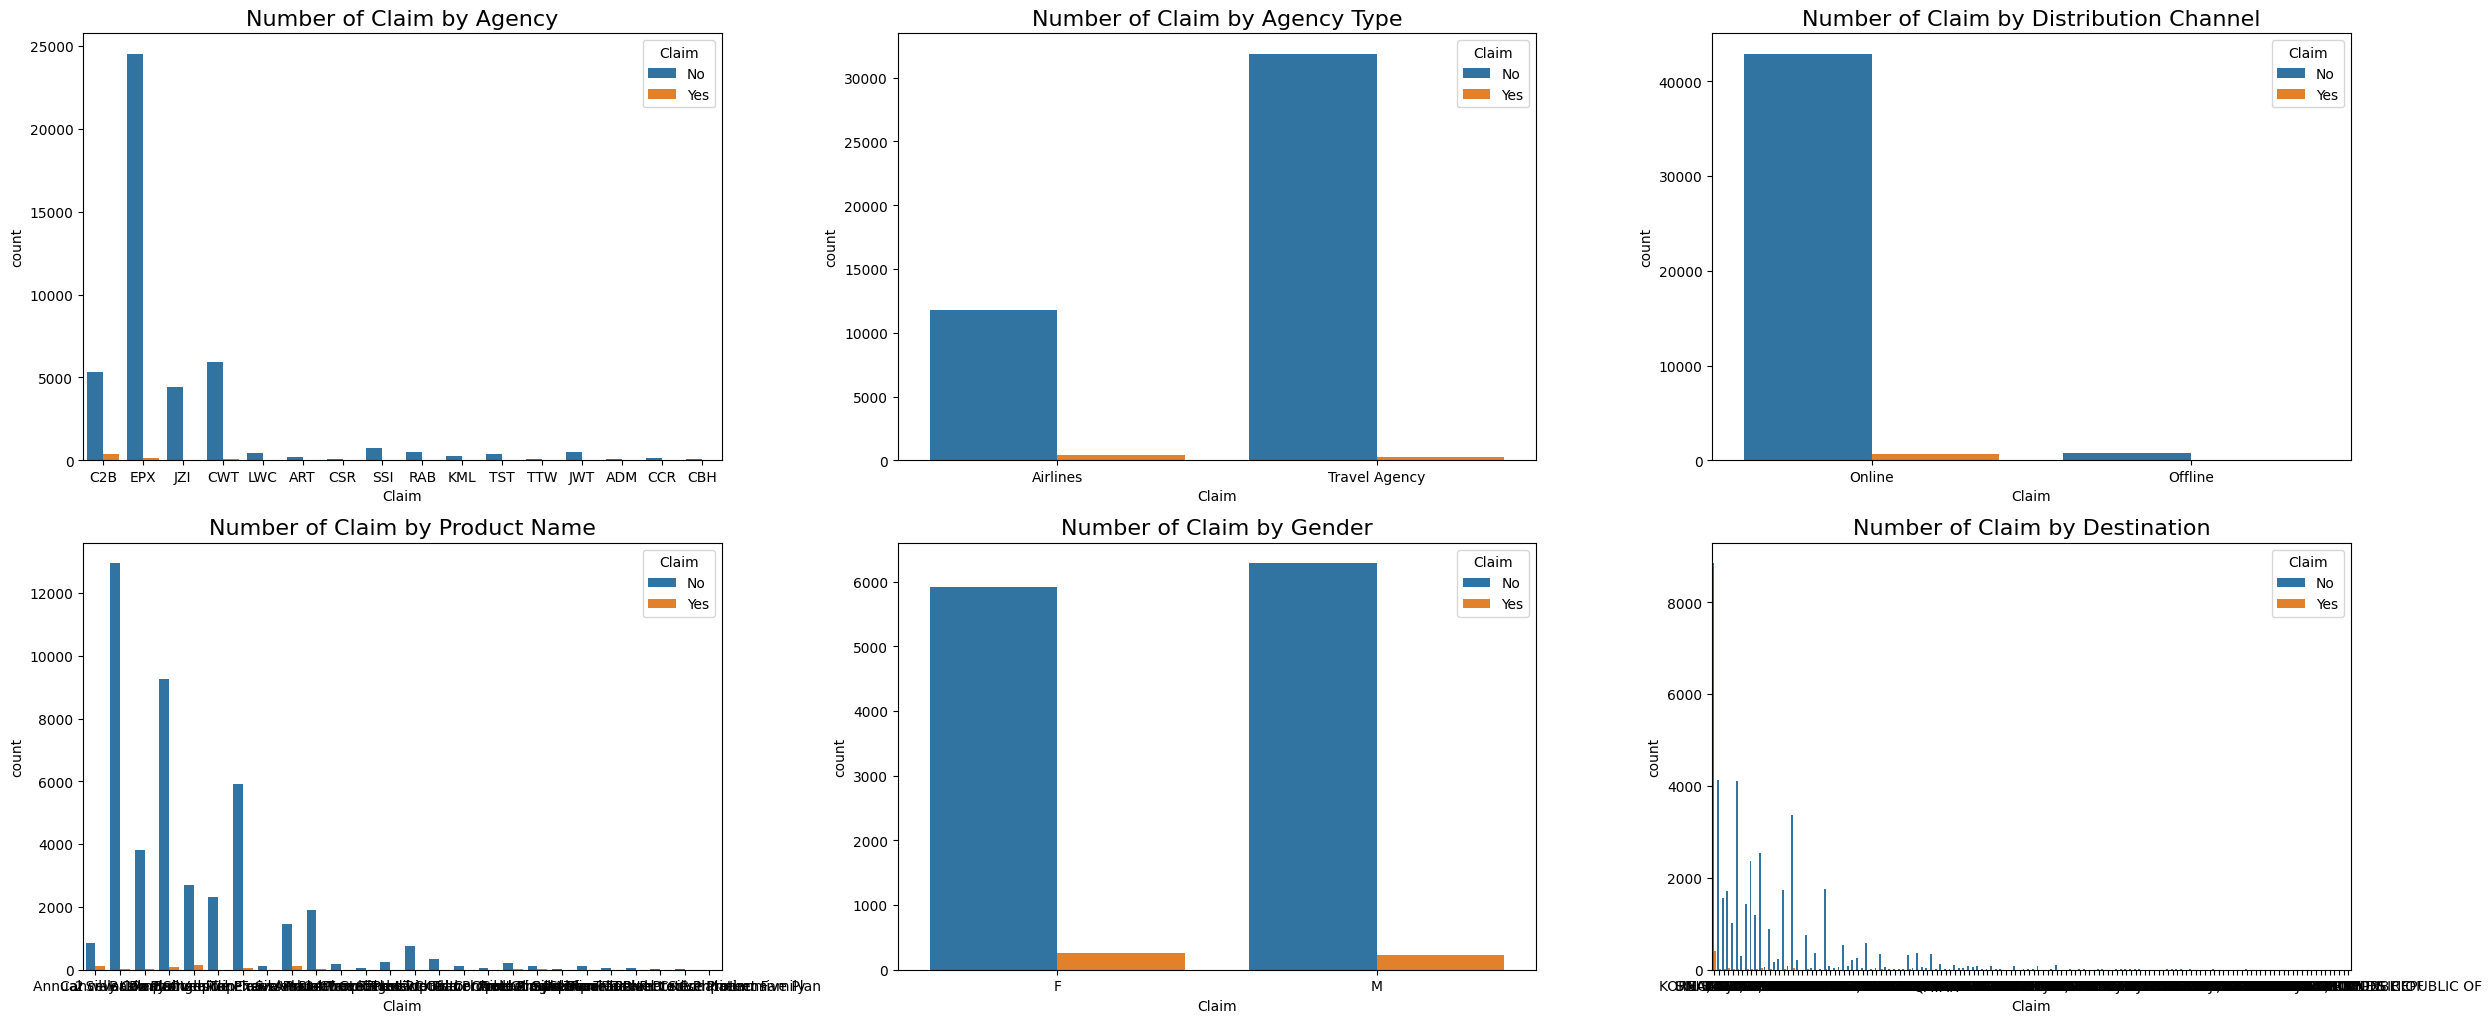

In [759]:
plt.figure(figsize=(25, 15))
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(x = feature, data = df, hue='Claim')
    plt.xlabel('Claim')
    plt.title(f'Number of Claim by {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

**Interpretasi:**

- Grafik hubungan claim antara fitur kategorikal nilai median tertinggi adalah No
- Grafik hubungan claim antara fitur kategorikal nilai median terendah adalah Yes

## **4. Data Preprocessing**

___________

Data Preprocessing terdiri dari mengubah data kolom claim, menghapus Baris Gender & Duration, Menghapus Duplikat, Handling Outlier, dan Encoding

### **4.1 Mengubah Data Kolom Claim**

In [760]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [761]:
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,0


**Interpretasi:**

- Target modelling yaitu claim diubah awal tipe data string menjadi string angka 0 dan 1 dapat mempermudah saat modelling

### **4.2 Menghapus Missing Value Gender,  menghapus kolom Age & Duration dan menghapus nilai 0 kolom net sales & Commision (in value)**

In [762]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [763]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,0


In [764]:
# nilai target pada dataset awal
display(df['Gender'].value_counts(), df['Duration'].value_counts())

Gender
M    6504
F    6177
Name: count, dtype: int64

Duration
6       1515
5       1463
7       1386
8       1369
4       1325
        ... 
4580       1
423        1
440        1
450        1
407        1
Name: count, Length: 437, dtype: int64

In [765]:
df['Net Sales'].value_counts()

Net Sales
20.00    4215
10.00    3315
22.00    1655
0.00     1291
18.00    1145
         ... 
2.72        1
57.24       1
7.55        1
2.55        1
49.39       1
Name: count, Length: 1006, dtype: int64

In [766]:
df['Commision (in value)'].value_counts()

Commision (in value)
0.00     24725
7.70      1169
17.82     1096
23.76      895
6.30       800
         ...  
38.25        1
6.67         1
6.39         1
1.71         1
32.18        1
Name: count, Length: 915, dtype: int64

In [767]:
df['Duration'].value_counts()

Duration
6       1515
5       1463
7       1386
8       1369
4       1325
        ... 
4580       1
423        1
440        1
450        1
407        1
Name: count, Length: 437, dtype: int64

In [768]:
df = df.drop(columns=['Gender','Duration','Age'])
df = df.drop(df[df['Commision (in value)']==0].index)
df = df.drop(df[df['Net Sales']==0].index)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE,216.0,54.0,0
2,JZI,Airlines,Online,Basic Plan,INDIA,22.0,7.7,0
4,C2B,Airlines,Online,Bronze Plan,SINGAPORE,16.0,4.0,0
8,JZI,Airlines,Online,Basic Plan,THAILAND,22.0,7.7,0
11,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE,216.0,54.0,0


In [769]:
df.shape

(18676, 8)

**Interpretasi**

- Menghapus kolom 'gender' karena data kosong lebih dari 70% saya hilangkan, membuat model hasil data tidak stabil
- Menghapus kolom 'duration' dihilangkan, membuat model hasil data tidak stabil
- Menghapus Nilai 0 kolom net sales & commision (in value), saya berasumsi kemungkinan nilai tidak 0 & membuat model hasil data tidak stabil

### **4.3 Menghapus Duplikat**

In [770]:
df.duplicated().sum()

16204

In [771]:
df = df.drop_duplicates()

In [772]:
df.duplicated().sum()

0

In [773]:
df = df.reset_index(drop=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE,216.00,54.00,0
1,JZI,Airlines,Online,Basic Plan,INDIA,22.00,7.70,0
2,C2B,Airlines,Online,Bronze Plan,SINGAPORE,16.00,4.00,0
3,JZI,Airlines,Online,Basic Plan,THAILAND,22.00,7.70,0
4,JZI,Airlines,Online,Basic Plan,"KOREA, REPUBLIC OF",26.00,9.10,0
...,...,...,...,...,...,...,...,...
2467,ADM,Travel Agency,Online,Premier Plan,FRANCE,130.00,49.40,0
2468,SSI,Airlines,Online,Ticket Protector,SINGAPORE,4.38,1.23,0
2469,SSI,Airlines,Online,Ticket Protector,SINGAPORE,16.54,4.64,0
2470,ART,Airlines,Online,24 Protect,THAILAND,49.39,17.29,0


In [774]:
df.shape

(2472, 8)

**Interpretasi:**

- Data duplikat 16204 dihilangkan karena saat modelling hasil kurang maksimal
- Data sudah tidak ada duplikat

### **4.4 Handling Outlier**

In [775]:
numerical_features = df.drop(columns=['Claim']).describe().columns

In [776]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Net Sales,-84.150,193.050,60,2228,184,9.87
1,Commision (in value),-38.445,89.595,0,2330,142,5.74


In [777]:
# proporsi target pada dataset awal
df['Claim'].value_counts()/len(df) * 100

Claim
0    90.331715
1     9.668285
Name: count, dtype: float64

In [778]:
# proporsi target untuk data outlier pada kolom SPEEDING_VIOLATIONS
df[df['Net Sales']> -84]['Claim'].value_counts()/len(df[df['Net Sales']> -84]) * 100

Claim
0    90.091211
1     9.908789
Name: count, dtype: float64

In [779]:
# proporsi target untuk data outlier pada kolom SPEEDING_VIOLATIONS
df[df['Commision (in value)']> -38]['Claim'].value_counts()/len(df[df['Commision (in value)']> -38]) * 100

Claim
0    90.331715
1     9.668285
Name: count, dtype: float64

**Interpretasi:**

- Nilai Outlier pada Net Sales, Commision (in value) dan claim sama, saya memustukan untuk tidak menghilangkan Outlier

### **4.5 Encoding**

In [780]:
# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [781]:
categorical_features = df.drop(columns='Claim').describe(include='object').columns

In [782]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Agency,14,"[ADM, ART, C2B, CBH, CCR, CSR, CWT, JWT, JZI, KML, LWC, RAB, SSI, TST]"
1,Agency Type,2,"[Airlines, Travel Agency]"
2,Distribution Channel,2,"[Offline, Online]"
3,Product Name,19,"[24 Protect, Annual Gold Plan, Annual Silver Plan, Annual Travel Protect Gold, Annual Travel Protect Platinum, Annual Travel Protect Silver, Basic Plan, Bronze Plan, Comprehensive Plan, Gold Plan, Premier Plan, Rental Vehicle Excess Insurance, Silver Plan, Single Trip Travel Protect Gold, Single Trip Travel Protect Platinum, Single Trip Travel Protect Silver, Ticket Protector, Travel Cruise Protect, Value Plan]"
4,Destination,92,"[ARGENTINA, AUSTRALIA, AUSTRIA, BAHRAIN, BANGLADESH, BELARUS, BELGIUM, BHUTAN, BRAZIL, BRUNEI DARUSSALAM, BULGARIA, CAMBODIA, CANADA, CHINA, COLOMBIA, CROATIA, CYPRUS, CZECH REPUBLIC, DENMARK, EGYPT, ESTONIA, ETHIOPIA, FAROE ISLANDS, FINLAND, FRANCE, GERMANY, GREECE, GUAM, GUINEA, HONG KONG, HUNGARY, ICELAND, INDIA, INDONESIA, IRAN, ISLAMIC REPUBLIC OF, IRELAND, ISRAEL, ITALY, JAPAN, JORDAN, KENYA, KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF, KOREA, REPUBLIC OF, LAO PEOPLE'S DEMOCRATIC REPUBLIC, LEBANON, LITHUANIA, LUXEMBOURG, MACAO, MALAYSIA, MALI, MALTA, MAURITIUS, MEXICO, MONGOLIA, MOROCCO, MYANMAR, NAMIBIA, NEPAL, NETHERLANDS, NEW ZEALAND, NORWAY, OMAN, PAKISTAN, PAPUA NEW GUINEA, PERU, PHILIPPINES, POLAND, PORTUGAL, QATAR, REPUBLIC OF MONTENEGRO, REUNION, ROMANIA, RUSSIAN FEDERATION, SAUDI ARABIA, SINGAPORE, SLOVENIA, SOUTH AFRICA, SPAIN, SRI LANKA, SWEDEN, SWITZERLAND, TAIWAN, PROVINCE OF CHINA, THAILAND, TRINIDAD AND TOBAGO, TUNISIA, TURKEY, TURKMENISTAN, UNITED ARAB EMIRATES, UNITED KINGDOM, UNITED STATES, VANUATU, VIET NAM]"


In [783]:
#Transformer

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Agency Type', 'Distribution Channel']),
    ('binhot', BinaryEncoder(), ['Agency', 'Product Name', 'Destination'])
], remainder='passthrough')


**Interpretasi:**
- Agency Type dan Distribution Channel saya masukkan kategori Onehot Encoder, karena kategori jumlah hanya 2 unique Data
- Agency, Product Name dan Destination saya masukkan kategori binary Encoder, karena kategori banyak lebih dari jumlah 7 unique Data

### **4.6 Scaling**

In [784]:
numerical_features = df.describe().drop(columns='Claim')

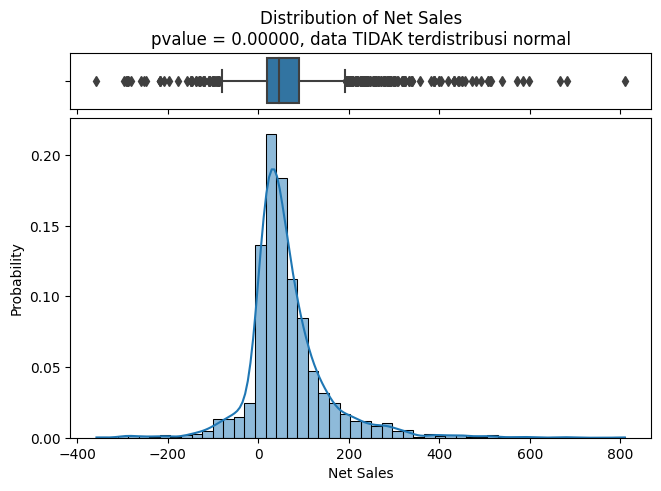

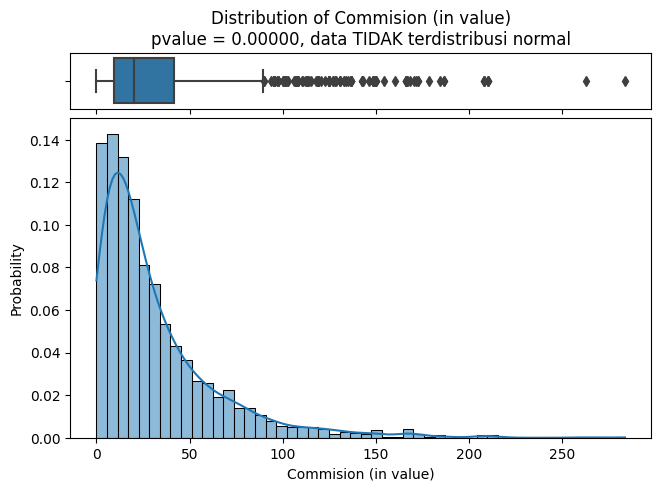

In [785]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

In [786]:
# scaling sebelum tuning dan Hyperparameter Tuning scaling
robust = RobustScaler()

**Interpretasi:**

- Dataset ini distribusi tidak normal, maka scaling gunakan robust scaler untuk modelling sebelum tuning dan sesudah tuning

### **4.7 Imbalance Data**

In [787]:
# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [788]:
# proporsi target pada dataset awal
df['Claim'].value_counts()/len(df) * 100

Claim
0    90.331715
1     9.668285
Name: count, dtype: float64

In [789]:
#Resampler 

smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)
near = NearMiss(n_neighbors= 5)

**Interpretasi:**

- Dataset ini data tidak balance saya menggunakan resample melakukan modelling

## **5. Data Splitting**

___

In [790]:
# train test split
from sklearn.model_selection import train_test_split

### **5.1 Define Features (X) and Target (y)**

In [791]:
# Features
X = df.drop(columns='Claim')

# target
y = df['Claim']

In [792]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Net Sales', 'Commision (in value)'],
      dtype='object')

**Interpretasi:**

- Untuk feature saya menamai X terdiri dari agency, agency type, distribution channel, product name, destination, net sales, commision (in value), dan age
- Untuk target saya menamai y adalah claim

### **5.2 Splitting Data**

In [793]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

**Interpretasi:**

- test size 0.2 yaitu mengtest data 20 persen dan mengtrain data 80 persen
- random state 0 yaitu hasil output tidak random data 
- Stratify y yaitu data dalam bentuk dan klasifikasi maka perlu dilakukan stratify

## **6. Modelling & Evaluation**

____

### **6.1 Modelling tanpa Tuning**

In [794]:
# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import recall_score

In [795]:

# Model Tree, Logistic Regression, KNN
tree = DecisionTreeClassifier(random_state=0)
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=10)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)



**Interpretasi**

- Saya menentukan 7 modeling sebelum dituning untuk dataset ini terdiri dari decision tree, logistic regression, knn, random forest, adaboost, gradient boost dan xgboost
- saya mencoba modelling terbaik untuk dataset ini 

#### **6.1.1 Recall X_train**

##### **6.1.1.1 Random Over Sampling (ROS)**

In [796]:
models = [knn, logreg, tree, rf, adaboost, gradboost, xgboost]
resampler = [ros, rus, smote, near]


list_mean = []
list_std = []
list_score = []

for algoritma in models:

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', ros),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'recall'
        
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

In [797]:
pd.DataFrame({
    'model' : ['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'mean recall' : list_mean,
    'std recall' : list_std,
    'score' : list_score
}).sort_values('mean recall', ascending=False)

,model,mean recall,std recall,score
1,logreg,0.712146,0.054519,"[0.658, 0.692, 0.789, 0.658, 0.763]"
4,adaboost,0.654656,0.032303,"[0.658, 0.615, 0.632, 0.658, 0.711]"
0,knn,0.643995,0.063394,"[0.684, 0.641, 0.658, 0.526, 0.711]"
5,gradboost,0.549933,0.069859,"[0.553, 0.513, 0.579, 0.447, 0.658]"
6,xgboost,0.177868,0.029636,"[0.132, 0.205, 0.158, 0.211, 0.184]"
2,tree,0.094197,0.012490,"[0.105, 0.103, 0.105, 0.079, 0.079]"
3,random forest,0.078408,0.022951,"[0.079, 0.103, 0.105, 0.053, 0.053]"


##### **6.1.1.2 Random Under Sampling (RUS)**

In [798]:
models = [knn, logreg, tree, rf, adaboost, gradboost, xgboost]
resampler = [ros, rus, smote]


list_mean = []
list_std = []
list_score = []

for algoritma in models:

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', rus),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'recall'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

In [799]:
pd.DataFrame({
    'model' : ['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'mean recall' : list_mean,
    'std recall' : list_std,
    'score' : list_score
}).sort_values('mean recall', ascending=False)

,model,mean recall,std recall,score
4,adaboost,0.675574,0.041030,"[0.632, 0.641, 0.658, 0.737, 0.711]"
1,logreg,0.659919,0.034472,"[0.658, 0.615, 0.711, 0.632, 0.684]"
5,gradboost,0.648718,0.056436,"[0.605, 0.744, 0.579, 0.658, 0.658]"
0,knn,0.633468,0.064571,"[0.526, 0.641, 0.684, 0.605, 0.711]"
6,xgboost,0.596491,0.038835,"[0.605, 0.667, 0.553, 0.579, 0.579]"
3,random forest,0.539541,0.075310,"[0.474, 0.487, 0.632, 0.474, 0.632]"
2,tree,0.491768,0.043152,"[0.447, 0.564, 0.5, 0.447, 0.5]"


##### **6.1.1.3 Smote**

In [800]:
models = [knn, logreg, tree, rf, adaboost, gradboost, xgboost]
resampler = [ros, rus, smote]


list_mean = []
list_std = []
list_score = []

for algoritma in models:

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'recall'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

In [801]:
pd.DataFrame({
    'model' : ['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'mean recall' : list_mean,
    'std recall' : list_std,
    'score' : list_score
}).sort_values('mean recall', ascending=False)

,model,mean recall,std recall,score
1,logreg,0.696896,0.072284,"[0.658, 0.59, 0.763, 0.684, 0.789]"
0,knn,0.602159,0.100054,"[0.605, 0.59, 0.605, 0.447, 0.763]"
4,adaboost,0.576518,0.072416,"[0.553, 0.462, 0.605, 0.579, 0.684]"
5,gradboost,0.560729,0.067102,"[0.526, 0.462, 0.553, 0.605, 0.658]"
6,xgboost,0.345749,0.057190,"[0.447, 0.308, 0.316, 0.289, 0.368]"
3,random forest,0.198785,0.025231,"[0.211, 0.231, 0.158, 0.211, 0.184]"
2,tree,0.172874,0.021712,"[0.211, 0.154, 0.158, 0.158, 0.184]"


##### **6.1.1.4 Near Miss**

In [802]:
models = [knn, logreg, tree, rf, adaboost, gradboost, xgboost]
resampler = [ros, rus, smote, near]


list_mean = []
list_std = []
list_score = []

for algoritma in models:

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', near),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'recall'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

In [803]:
pd.DataFrame({
    'model' : ['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'mean recall' : list_mean,
    'std recall' : list_std,
    'score' : list_score
}).sort_values('mean recall', ascending=False)

,model,mean recall,std recall,score
3,random forest,0.670040,0.074101,"[0.789, 0.692, 0.579, 0.684, 0.605]"
2,tree,0.664777,0.080998,"[0.789, 0.692, 0.553, 0.684, 0.605]"
5,gradboost,0.659649,0.079897,"[0.789, 0.667, 0.553, 0.684, 0.605]"
6,xgboost,0.659514,0.058479,"[0.737, 0.692, 0.579, 0.684, 0.605]"
4,adaboost,0.638596,0.065971,"[0.737, 0.667, 0.553, 0.658, 0.579]"
1,logreg,0.607422,0.077454,"[0.737, 0.59, 0.5, 0.632, 0.579]"
0,knn,0.560594,0.092464,"[0.711, 0.487, 0.447, 0.605, 0.553]"


**Interpretasi**

ROS:

- Model tertinggi berdasarkan rata-rata yaitu logistic regression sebesar 0.712
- Model terendah berdasarkan rata-rata yaitu decision tree sebesar 0.078
- Model nilai standar deviasi stabil yaitu decision tree sebesar 0.0124
- Model nilai standar deviasi tidak stabil yaitu gradien boost sebesar 0.0698

RUS:

- Model tertinggi berdasarkan rata-rata yaitu ada boost sebesar 0.675
- Model terendah berdasarkan rata-rata yaitu decision tree sebesar 0.491
- Model nilai standar deviasi stabil yaitu logistic regression sebesar 0.034
- Model nilai standar deviasi tidak stabil yaitu random forest sebesar 0.075

Smote:

- Model tertinggi berdasarkan rata-rata yaitu logistic regression sebesar 0.696
- Model terendah berdasarkan rata-rata yaitu decision tree sebesar 0.172
- Model nilai standar deviasi stabil yaitu decision tree sebesar 0.0217
- Model nilai standar deviasi tidak stabil yaitu knn sebesar 0.10005

Near Miss:

- Model tertinggi berdasarkan rata-rata yaitu random forest sebesar 0.67
- Model terendah berdasarkan rata-rata yaitu knn sebesar 0.56
- Model nilai standar deviasi stabil yaitu xgboost sebesar 0.058
- Model nilai standar deviasi tidak stabil yaitu decision tree sebesar 0.080


Kesimpulan Model:
- Berdasarkan kesimpulan dari sampler yang digunakan random over sampling yang digunakan, nilai modelling data tertinggi sebesar 0.712 & modellling yang kepilih Logistic Regression untuk nilai recall score

#### **6.1.2 Predict Benchmark Model to Test Set**

In [804]:
list_recall_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', ros),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate (recall)
    score = recall_score(y_test, y_pred)
    list_recall_score.append(score)

In [805]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'recall_score (test_set)': list_recall_score
}).sort_values('recall_score (test_set)', ascending=False)

,model,recall_score (test_set)
1,logreg,0.791667
4,adaboost,0.708333
0,knn,0.645833
5,gradboost,0.625000
6,xgboost,0.250000
2,tree,0.041667
3,random forest,0.041667


**Interpretasi**

- Model Test set tertinggi sebesar 0.791 pada model logistic regression
- Model Test set terendah sebesar 0.041 pada model random forest

### **6.2 Hyperparameter Tuning**

In [806]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# metrics untuk klasifikasi
from sklearn.metrics import recall_score, classification_report, confusion_matrix

#### **6.2.1 Logistic Regression**

**Tuning 1**

In [807]:
# Hyperparameter space Logistic Regression
hyperparam_space_logreg = {
    'resampler':[smote, rus, ros, None],
    'model__C': [1000 , 100, 10, 1, 0.1, 0.01, 0.001], 
    'model__solver':['liblinear','newton-cg', 'sag']
}

In [808]:
# Benchmark model 1
logreg = LogisticRegression(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', logreg)
    ])

# Hyperparameter tuning
random_logreg = RandomizedSearchCV(
    estimator=estimator_logreg, 
    param_distributions = hyperparam_space_logreg, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [809]:
# fitting 
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binhot',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination'])])),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [1000, 100, 10, 1, 0.1,
                                                     0.01, 0.001],
                                        'model__solver': ['liblinear',
                                                          'newton-cg', 'sag'],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='recall')

In [810]:
# score recall
random_logreg.best_score_

0.7330634278002699

In [811]:
random_logreg.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'model__solver': 'liblinear',
 'model__C': 1000}

In [812]:
pd.DataFrame(random_logreg.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__solver,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.040948,0.006100,0.011873,0.002760,RandomUnderSampler(random_state=0),liblinear,1000,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 1000}",0.710526,0.717949,0.736842,0.736842,0.763158,0.733063,0.018279,1
17,0.051251,0.007240,0.011086,0.001594,RandomUnderSampler(random_state=0),newton-cg,100,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'newton-cg', 'model__C': 100}",0.710526,0.717949,0.736842,0.736842,0.763158,0.733063,0.018279,1
13,0.035442,0.001486,0.011714,0.002463,RandomUnderSampler(random_state=0),liblinear,100,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 100}",0.710526,0.717949,0.736842,0.736842,0.763158,0.733063,0.018279,1
5,0.053299,0.006571,0.013217,0.000873,RandomUnderSampler(random_state=0),newton-cg,1000,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'newton-cg', 'model__C': 1000}",0.710526,0.717949,0.736842,0.736842,0.763158,0.733063,0.018279,1
25,0.035536,0.002952,0.011010,0.001485,RandomUnderSampler(random_state=0),liblinear,10,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 10}",0.710526,0.692308,0.763158,0.710526,0.763158,0.727935,0.029519,5
29,0.045393,0.006429,0.010908,0.000734,RandomUnderSampler(random_state=0),newton-cg,10,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'newton-cg', 'model__C': 10}",0.710526,0.692308,0.763158,0.710526,0.763158,0.727935,0.029519,5
9,0.046503,0.001560,0.009810,0.000602,RandomUnderSampler(random_state=0),sag,1000,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'sag', 'model__C': 1000}",0.710526,0.692308,0.763158,0.710526,0.763158,0.727935,0.029519,5
21,0.047413,0.002117,0.010224,0.001164,RandomUnderSampler(random_state=0),sag,100,"{'resampler': RandomUnderSampler(random_state=0), 'model__solver': 'sag', 'model__C': 100}",0.710526,0.692308,0.763158,0.710526,0.763158,0.727935,0.029519,5
26,0.044148,0.002895,0.010655,0.000744,RandomOverSampler(random_state=0),liblinear,10,"{'resampler': RandomOverSampler(random_state=0), 'model__solver': 'liblinear', 'model__C': 10}",0.657895,0.692308,0.789474,0.710526,0.763158,0.722672,0.047681,9
30,0.056101,0.002537,0.010109,0.000588,RandomOverSampler(random_state=0),newton-cg,10,"{'resampler': RandomOverSampler(random_state=0), 'model__solver': 'newton-cg', 'model__C': 10}",0.657895,0.692308,0.789474,0.710526,0.763158,0.722672,0.047681,9


**Interpretasi**

- Nilai terbaik setelah tuning pertama yaitu 0.733
- Resampler digunakan yaitu random under sampling

**Tuning 2**

In [813]:
# Hyperparameter space Logistic Regression
hyperparam_space_logreg = {
    'resampler':[rus, None],
    'model__C': [100, 10, 1, 0.1, 0.01], 
    'model__solver':['liblinear','newton-cg', 'sag']
}

In [814]:
# Benchmark model 1
logreg = LogisticRegression(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', logreg)
    ])

# Hyperparameter tuning
random_logreg = RandomizedSearchCV(
    estimator=estimator_logreg, 
    param_distributions = hyperparam_space_logreg, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=500
)

In [815]:
# fitting 
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel']),
                                                                              ('binhot',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination'])])),
                                             ('scaler', RobustScaler()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [100, 10, 1, 0.1, 0.01],
                                        'model__solver': ['liblinear',
                                                          'newton-cg', 'sag'],
                                        'resampler': [RandomUnderSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='recall')

In [816]:
# score recall
random_logreg.best_score_

0.7330634278002699

In [817]:
random_logreg.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'model__solver': 'liblinear',
 'model__C': 100}

**Interpretasi**

- Nilai terbaik sebelum tuning adalah 0.712
- Nilai terbaik setelah tuning adalah 0.733
- Mempersempit hasil tuning dari parameter terbaik tuning pertama 1 sebelumnya hasil nilai terbaik sama
- Nilai terbaik sebelum dan sesudah tuning mengalami sedikit peningkatan sebesar 0.021

#### **6.2.2 Predict to Test Set**

**Before Tuning**

In [818]:
list_recall_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', ros),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate (recall)
    score = recall_score(y_test, y_pred)
    list_recall_score.append(score)

In [819]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['knn', 'logreg', 'tree', 'random forest', 'adaboost', 'gradboost', 'xgboost'],
    'recall_score (test_set)': list_recall_score
}).sort_values('recall_score (test_set)', ascending=False).head(1)

,model,recall_score (test_set)
1,logreg,0.791667


**After Tuning**

In [820]:
random_logreg.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('binhot', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('scaler', RobustScaler()),
                ('resampler', RandomUnderSampler(random_state=0)),
                ('model',
                 LogisticRegression(C=100, random_state=0,
                                    solver='liblinear'))])

In [821]:
# define model
model = random_logreg.best_estimator_

# fitting
model.fit(X_train, y_train)

# predict 
y_pred_rf_tuning = model.predict(X_test)

# evaluate (recall score)
recall_score(y_test, y_pred_rf_tuning)

0.8125

**Interpretasi**

- Hasil sebelum tuning test set sebesar 0.791
- Hasil sesudah tuning test set sebesar 0.812
- Hasil sebelum dan sesudah tuning test set mengalami peningkatan sebesar 0.021

### **6.3 Final Model dan Model Interpretation**

#### **6.3.1 Final Model**

In [822]:
# final model
final_model = random_logreg.best_estimator_

**Interpretasi**

logistic regression adalah metode analisis regresi memprediksi nilai dalam bentuk binary dari suatu variabel dependen berdasarkan nilai-nilai variabel independen. cara kerja Logistic regression memberikan hubungan antara dua variable menggunakan persamaan untuk menyusun plot grafik sepanjang sumbu x dan sumbu y dengan menempatkan nilai yang berbeda.
 [[Sumber](https://rifqimulyawan.com/kamus/logistic-regression/)] 

Cara Kerja Model 1:


![](https://d1.awsstatic.com/sigmoid.bfc853980146c5868a496eafea4fb79907675f44.png)

Keterangan:

x : variabel independen, variabel prediktor, atau variabel eksplanatori karena memiliki nilai yang diketahui 
 
e : Nilai Explanatori. [[Sumber](https://aws.amazon.com/id/what-is/logistic-regression/)]

Cara Kerja Model 2:

y = β0 + β1x1 + β2x2+… βnxn [[Sumber](https://aws.amazon.com/id/what-is/logistic-regression/)]

Keterangan:

y : variabel dependen, variabel hasil, atau variabel respons karena nilainya tidak diketahui [[Sumber](https://aws.amazon.com/id/what-is/logistic-regression/)]

β0: konstanta (intercept) dari model [[Sumber](https://rifqimulyawan.com/kamus/logistic-regression/)]

β1, β2, …, βn: koefisien regresi dari masing-masing variabel [[Sumber](https://rifqimulyawan.com/kamus/logistic-regression/)]

X1, X2, …, Xn: variabel independen yang digunakan dalam model [[Sumber](https://rifqimulyawan.com/kamus/logistic-regression/)]

#### **6.3.2 Model Interpretation**

##### **6.3.2.1 Feature Importance**

In [823]:
final_model.named_steps['model'].coef_[0]

array([-0.71484631,  0.71484631,  0.73771966, -0.73771966, -1.17533768,
       -2.70324028, -0.30740345, -0.65905887,  5.12116399,  0.58492679,
        0.92925023, -0.57803965,  1.28260732, -4.84966317, -1.10576602,
        0.01687352,  0.20095021, -0.07435376,  0.17143662,  0.27900501,
        0.44748647, -0.74996983])

In [824]:
feature_onehot = list(final_model['preprocess'].transformers_[0][1].get_feature_names_out())
feature_binhot = list(final_model['preprocess'].transformers_[1][1].get_feature_names_out())
feature_remainder = list(X.columns[final_model['preprocess'].transformers_[2][2]])
feature_names = feature_onehot + feature_binhot + feature_remainder

In [825]:
df_importances = pd.DataFrame({
    'features' : feature_names,
    'importance' : final_model.named_steps['model'].coef_[0]
}).sort_values('importance', ascending=False)
df_importances

,features,importance
8,Product Name_0,5.121164
12,Product Name_4,1.282607
10,Product Name_2,0.929250
2,Distribution Channel_Offline,0.737720
1,Agency Type_Travel Agency,0.714846
9,Product Name_1,0.584927
20,Net Sales,0.447486
19,Destination_6,0.279005
16,Destination_3,0.200950
18,Destination_5,0.171437


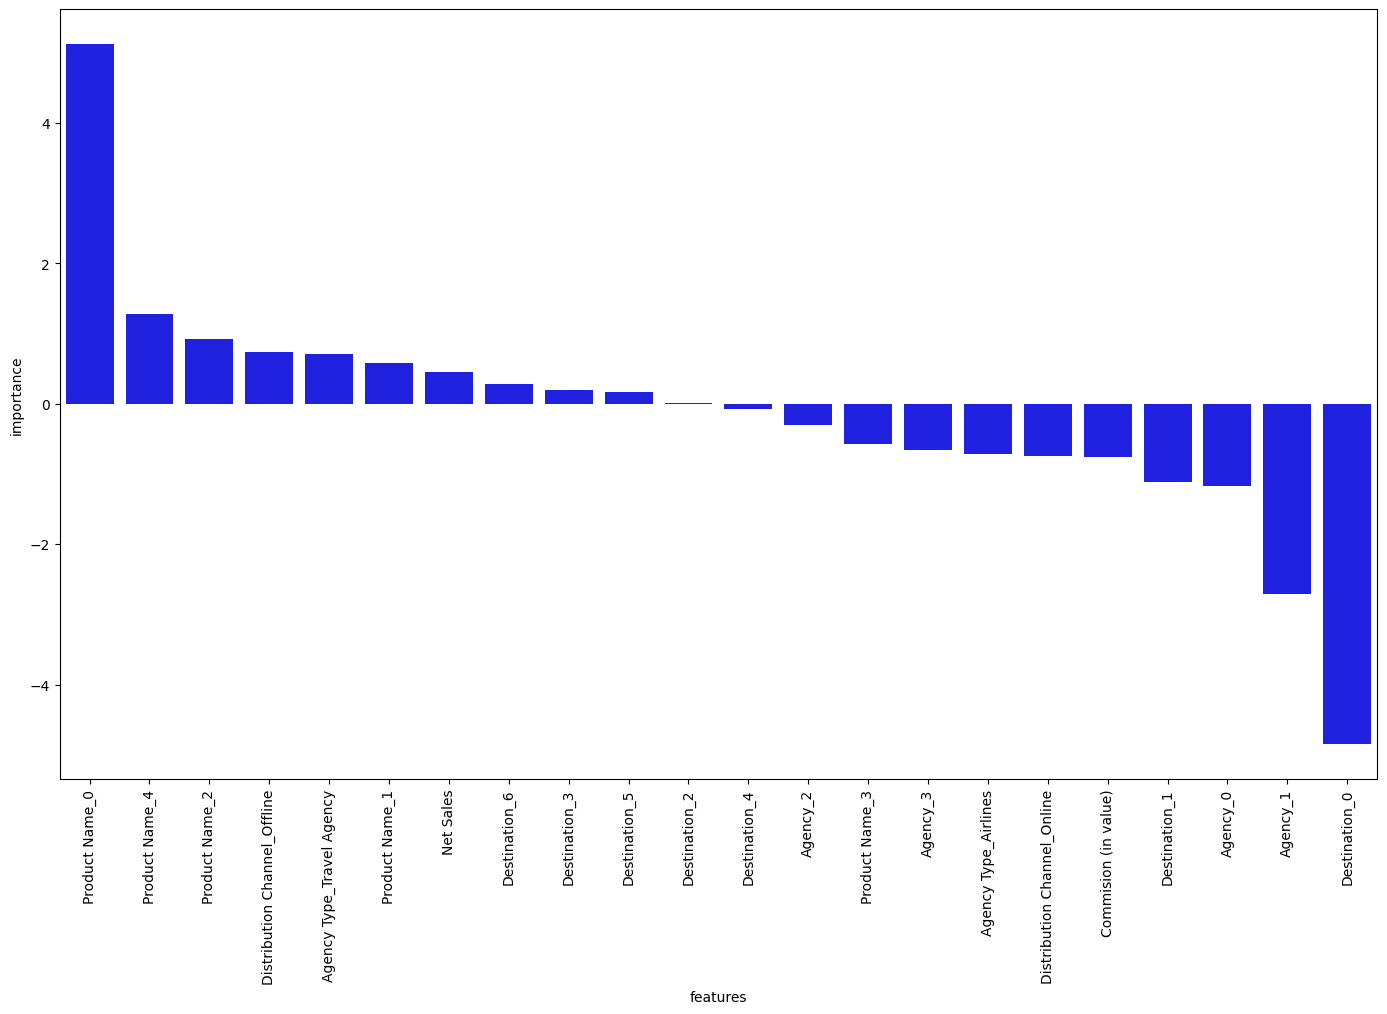

In [826]:
plt.figure(figsize=(17,10))
sns.barplot(data=df_importances.sort_values('importance', ascending=False), x='features', y='importance', color='b')
plt.xticks(rotation=90)
plt.show()

**Interpretasi**

- Bentuk Grafik diatas berdasarkan Nilai positif dan Nilai Negatif
- Feature Importance paling penting adalah Product name_0 dan Destination_0
- Feature Importance Tidak penting adalah Destination_2 dan Destination 4
- Feature Importance tertinggi product name_0 sebesar 5.12
- Feature Importance terendah Destination_2 sebesar 0.016

##### **6.3.2.2 Confusion Matrix**

In [827]:
# print
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       447
           1       0.12      0.25      0.16        48

    accuracy                           0.74       495
   macro avg       0.51      0.52      0.50       495
weighted avg       0.83      0.74      0.78       495



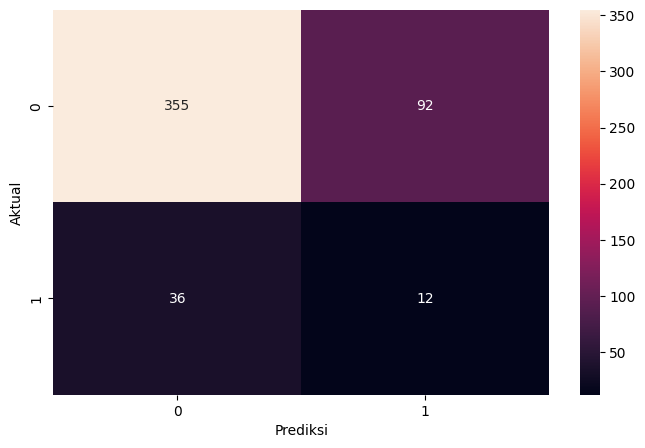

In [828]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual');

**Interpretasi**

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah penumpang yang aktualnya klaim dan diprediksi akan klaim (True Positive) : 12 orang
- Jumlah penumpang yang aktualnya klaim tetapi diprediksi tidak akan klaim (False Negative) : 36 orang
- Jumlah penumpang yang aktualnya tidak klaim dan diprediksi tidak akan klaim (True Negative) : 355 orang
- Jumlah penumpang yang aktualnya tidak klaim tetapi diprediksi akan klaim (False Positive) : 92 orang

### **6.4 Cost Evaluation**

_____

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya Net sales berdasarkan 5 % dari total kesuluruhan harga perjalanan per klaim dari satu calon penumpang
- Biaya total kesuluruhan disini harga $ 3000

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi jumlah penumpang yang tidak klaim. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh pengguna asuransi perjalanan.

Cost Estimation sebelum menggunakan machine learning

Jumlah calon penumpang untuk dasar perhitungan :
- calon penumpang yang diberikan program retensi = 495 orang
- calon penumpang yang aktualnya klaim = 48 orang

- 495 orang x 300 dollar sekali perjalanan + 48 orang x  300 dollar sekali perjalanan = ($ 148.500 + $ 14.400)sekali perjalanan = $ 162.990 sekali perjalanan

Maka kerugiannya sekitar **$ 162.990 per perjalanan** bila kita tidak menggunakan machine learning.

---

Saat kita menggunakan machine learning, kita hanya menawarkan program retensi ke calon penumpang yang diprediksi tidak klaim.

---


Cost Estimation sesudah menggunakan machine learning

Jumlah calon penumpang untuk dasar perhitungan :
- calon penumpang yang kita berikan program retensi = TP + FN = 36 + 12 = 48 orang
- calon penumpang yang aktualnya Claim = 48 orang


- 48 orang x 300 dollar sekali perjalanan + 48 orang x 300 dollat sekali perjalanan = (14.400 +  14.400) dollar sekali perjalanan = $ 28.800 sekali perjalanan

Penurunan mengurangi kerugian = 148.500 dollar -  28.800 dollar = 119.700 dollar sekali perjalanan

**% Penurunan** =  119.700 dollar /  148.500 dollar  x 100 = **80.6%**

Berdasarkan test set, model kita dapat menurunkan kerugian akibat tidak klaim hingga **80.6%** sekali perjalanan.

## **7. Limitasi Model**

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya Net sales berdasarkan 5 % dari total kesuluruhan harga perjalanan
- Biaya total Perjalanan kesulurhan disini harga $ 3000

**Interpretasi** 

limitasi model pada data set ini yaitu berdasarkan net sales, karena harga net sales bergantung pada 5% dari total kesuluruhan biaya perjalanan yang dikeluarkan oleh calon penumpang

## **8. Kesimpulan**

**Interpretasi Kesimpulan Data Understanding**

- Dataset diatas terdiri dari 44328 baris dan 10 kolom
- Tipe data terdiri dari objek, interger, dan float
- Missing Value pada kolom Gender
- Data duplikat sebesar 4667 baris
- Statistik numerikal Count sebesar 44328 semua kolom
- Statistik numerikal kolom Duration nilai mean dan std range 49 sampai 110
- Statistik numerikal kolom Duration nilai min sampai max range -1 sampai dengan 4881.00
- Statistik kategorikal kolom Agency nilai unique 16
- Statistik kategorikal kolom Agency kata yang sering digunakan EPX
- Statistik kategorikal kolom Agency jumlah frekuensi kata yang sering ada sebesar 24656


**Interpretasi Kesimpulan EDA**

- fitur numerikal terdiri dari age, commision(invalue), net sales dan duration 
- Berdasarkan grafik diatas data fitur numerikal, distribusi data tidak normal nilai pvalue <0.05 
- Grafik diatas menggunakan boxplot dan histogram
- Fitur kategorikal terdiri dari agency, agency type, distribution channel dan product name
- Grafik agency tertinggi adalah EPX  
- Grafik agency terendah adalah ADM
- Grafik agency type tertinggi adalah Travel Agency
- Grafik agency type terendah adalah Airlines
- Grafik distribution name tertinggi adalah Online
- Grafik distribution name terendah adalah Offline
- Grafik product name tertinggi adalah Cancellation Plan
- Grafik product name terendah adalah Travel Cruise Protect Family
- Korelasi nilai lemah sebesar 0.30 dari hubungan Commision (in Value) dan net sales, nilai commision (in value) naik maka nilai net sales cukup naik
- Korelasi nilai lemah sebesar -0.01 dari hubungan Age dan Duration, nilai Age naik maka nilai Duration cukup turun
- Grafik hubungan claim antara duration, net sales, dan commision (in value) nilai tengah tertinggi adalah klaim yes 
- Grafik hubungan claim dan duration, net sales, dan commision (in value) nilai tengah terendah adalah klaim no 
- Grafik hubungan claim dan age nilai tengah sama tinggi antara klaim yes dan no 
- Grafik hubungan claim antara fitur kategorikal nilai median tertinggi adalah No
- Grafik hubungan claim antara fitur kategorikal nilai median terendah adalah Yes

**Interpretasi Kesimpulan Data Preprocessing**

- Target modelling yaitu claim diubah awal tipe data string menjadi string angka 0 dan 1 dapat mempermudah saat modelling
- Menghapus kolom 'gender' karena data kosong lebih dari 70% saya hilangkan, membuat model hasil data tidak stabil
- Menghapus kolom 'duration' dihilangkan, membuat model hasil data tidak stabil
- Menghapus Nilai 0 kolom net sales & commision (in value), saya berasumsi kemungkinan nilai tidak 0 & membuat model hasil data tidak stabil
- Data duplikat 16204 dihilangkan karena saat modelling hasil kurang maksimal
- Data sudah tidak ada duplikat
- Nilai Outlier pada Net Sales, Commision (in value) dan claim sama, saya memustukan untuk tidak menghilangkan Outlier
- Agency Type dan Distribution Channel saya masukkan kategori Onehot Encoder, karena kategori jumlah hanya 2 unique Data
- Agency, Product Name dan Destination saya masukkan kategori binary Encoder, karena kategori banyak lebih dari jumlah 7 unique Data
- Dataset ini distribusi tidak normal, maka scaling gunakan robust scaler untuk modelling sebelum tuning dan sesudah tuning
- Dataset ini data tidak balance saya menggunakan resample melakukan modelling

**Interpretasi Kesimpulan Data Splitting**

- test size 0.2 yaitu mengtest data 20 persen dan mengtrain data 80 persen
- random state 0 yaitu hasil output tidak random data 
- Stratify y yaitu data dalam bentuk dan klasifikasi maka perlu dilakukan stratify
- Untuk feature saya menamai X terdiri dari agency, agency type, distribution channel, product name, destination, net sales, commision (in value), dan age
- Untuk target saya menamai y adalah claim

**Interpretasi Kesimpulan Model**

- Model yang terbaik Logistic Regression
- Nilai terbaik Train set sebelum tuning adalah 0.712
- Nilai terbaik Train set setelah tuning adalah 0.733
- Hasil sebelum tuning test set sebesar 0.791
- Hasil sesudah tuning test set sebesar 0.812

**Interpretasi Kesimpulan Final Model**

Cara kerja Logistic regression memberikan hubungan antara dua variable menggunakan persamaan untuk menyusun plot grafik sepanjang sumbu x dan sumbu y dengan menempatkan nilai yang berbeda.

**Interpretasi Kesimpulan Feature Importance**

- Bentuk Grafik diatas berdasarkan Nilai positif dan Nilai Negatif
- Feature Importance paling penting adalah Product name_0 dan Destination_0
- Feature Importance Tidak penting adalah Destination_2 dan Destination 4
- Feature Importance tertinggi product name_0 sebesar 5.12
- Feature Importance terendah Destination_2 sebesar 0.016

**Interpretasi Kesimpulan Confusion Matrix**

- Jumlah penumpang yang aktualnya klaim dan diprediksi akan klaim (True Positive) : 12 orang
- Jumlah penumpang yang aktualnya klaim tetapi diprediksi tidak akan klaim (False Negative) : 36 orang
- Jumlah penumpang yang aktualnya tidak klaim dan diprediksi tidak akan klaim (True Negative) : 355 orang
- Jumlah penumpang yang aktualnya tidak klaim tetapi diprediksi akan klaim (False Positive) : 92 orang

**Interpretasi Kesimpulan Cost Evaluation**

- Berdasarkan model yang terbaik kita dapat menghitung kerugian asuransi perjalanan yang prediksinya tidak klaim dapat menurunkan kerugian persentase sebesar **80.6%** sekali perjalanan.

**Interpretasi Kesimpulan Limitasi Model** 

limitasi model pada data set ini yaitu berdasarkan net sales, karena harga net sales bergantung pada 5% dari total kesuluruhan biaya perjalanan yang dikeluarkan oleh calon penumpang



## **9. Rekomendasi**

**Interpretasi Rekomendasi Cost Evaluation dan Data Business Understanding**

- Harga total perjalanan sangat berpengaruh untuk mengurangi kerugian dari asuransi, maka perlu menambahkan harga total perjalanan dalam dataset ini

## **10. Save Model**


In [829]:
import pickle

In [831]:
# saving model

# best model
final_model = random_logreg.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('Capstone_3_Model_Logistic_Regression_Classification.sav', 'wb'))

**Interpretasi**

- Mensave Model terbaik